# HISTORY

* This repository is associated with the Left Atrial Segmentation Challenge 2013 (LASC'13). LASC'13 was part of the STACOM'13 workshop, held in conjunction with MICCAI'13. Seven international research groups, comprising 11 algorithms, participated in the challenge.

* For a detailed report, please refer to:

* Tobon-Gomez C, Geers AJ, Peters, J, Weese J, Pinto K, Karim R, Ammar M, Daoudi A, Margeta J, Sandoval Z, Stender B, Zheng Y, Zuluaga, MA, Betancur J, Ayache N, Chikh MA, Dillenseger J-L, Kelm BM, Mahmoudi S, Ourselin S, Schlaefer A, Schaeffter T, Razavi R, Rhode KS. Benchmark for Algorithms Segmenting the Left Atrium From 3D CT and MRI Datasets. IEEE Transactions on Medical Imaging, 34(7):1460–1473, 2015.

* The challenge is also featured on Cardiac Atlas Project.

* The Python scripts in this repository take as input a segmentation and output the two evaluation metrics described in the paper.

* The data and code of the challenge have been made publicly available to serve as a benchmark for left atrial segmentation algorithms.


* **CT**: Computed tomography
* **GT**: Ground truth
* **MRI**: Magnetic resonance imaging
* **LA**: Left atrium
* **LASC**'13: Left Atrial Segmentation Challenge 2013
* **PV**: Pulmonary vein


* The benchmark consists of 30 CT and 30 MRI datasets. Per modality, 10 datasets are for training of segmentation algorithms and 20 datasets are for testing.

#### The MRI datasets are publicly available on Figshare:
* Training
* Testing
* Results

#### WHAT IS NII


* NII files mostly belong to NIfTI-1 Data Format by Neuroimaging Informatics Technology Initiative. NIfTI-1 is adapted from the widely used ANALYZE 7.5 file format. The hope is that older non-NIfTI-aware software that uses the ANALYZE 7.5 format will still be compatible with NIfTI-1.


**Identifier:**	Hex: 00 00 01 5C 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00


* You need a suitable software like NIfTI-1 Data Format from Neuroimaging Informatics Technology Initiative to open a NII file. Without proper software you will receive a Windows message "How do you want to open this file?" or "Windows cannot open this file" or a similar Mac/iPhone/Android alert.

# PACKAGES AND LIBRARIES

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from keras.models import Model
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# OVERVIEW

#### EXAMPLE PATH

In [2]:
Example_Train_NII_Path = "C:/Users/johnm/Downloads/input/heart-mri-image-dataset-left-atrial-segmentation/imagesTr/la_016.nii"
Example_Label_NII_Path = "C:/Users/johnm/Downloads/input/heart-mri-image-dataset-left-atrial-segmentation/labelsTr/la_016.nii"

In [3]:
Example_Reading_Train_NII = nib.load("D:/archive (1)/imagesTr/la_016.nii")
Example_Reading_Label_NII = nib.load("D:/archive (1)/labelsTr/la_016.nii")

In [4]:
print(type(Example_Reading_Train_NII))

<class 'nibabel.nifti1.Nifti1Image'>


In [5]:
print(Example_Reading_Train_NII) # general info

<class 'nibabel.nifti1.Nifti1Image'>
data shape (320, 320, 90)
affine: 
[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 320 320  90   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code    

In [6]:
print(Example_Reading_Train_NII.affine)

[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]


In [7]:
print(Example_Reading_Train_NII.extra)

{}


In [8]:
print(Example_Reading_Train_NII.dataobj.dtype)

float32


In [9]:
print(Example_Reading_Train_NII.get_data_dtype())

float32


In [10]:
print(Example_Reading_Train_NII.get_filename())

D:/archive (1)/imagesTr/la_016.nii


In [11]:
print(Example_Reading_Train_NII.get_fdata())

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [12]:
print(Example_Reading_Train_NII.file_map.keys())

dict_keys(['image'])


In [13]:
print(Example_Reading_Train_NII.file_map.items())

dict_items([('image', <nibabel.fileholders.FileHolder object at 0x00000204C338F970>)])


In [14]:
print(Example_Reading_Train_NII.file_map["image"].filename)

D:/archive (1)/imagesTr/la_016.nii


In [15]:
print(Example_Reading_Train_NII.get_qform())

[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]


In [16]:
print(Example_Reading_Train_NII.get_data()) # image

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [17]:
print(Example_Reading_Train_NII.get_data().shape)

(320, 320, 90)


In [18]:
print(Example_Reading_Train_NII.get_data()[0].shape)

(320, 90)


In [19]:
Example_ALL_Images = Example_Reading_Train_NII.get_data()
Example_ALL_Labels = Example_Reading_Label_NII.get_data()

In [20]:
print(Example_ALL_Images[0].shape)
print(Example_ALL_Labels[0].shape)

(320, 90)
(320, 90)


In [21]:
print(Example_ALL_Images[Example_ALL_Images.shape[0]//2].shape)

(320, 90)


In [22]:
print(Example_ALL_Images.shape[0]//2)

160


In [23]:
print(Example_ALL_Images[Example_ALL_Images.shape[0]//2])

[[ 48.  68.  46. ... 273. 276. 261.]
 [ 44.  55.  39. ... 283. 276. 240.]
 [ 46.  39.  33. ... 252. 251. 211.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [24]:
print(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)

(320, 90)


#### EXAMPLE VISION

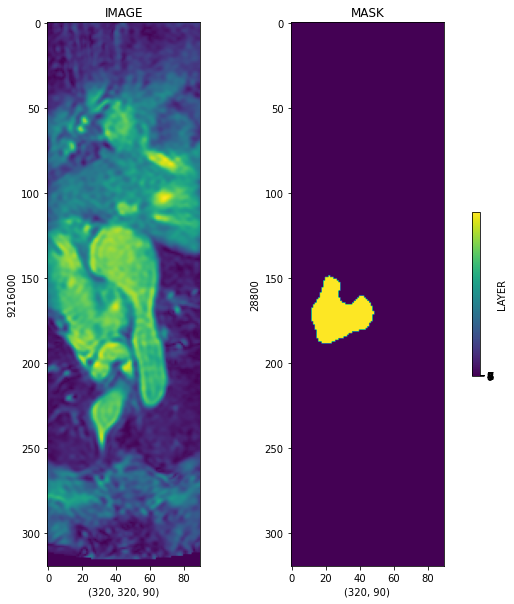

In [25]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2])
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2])
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

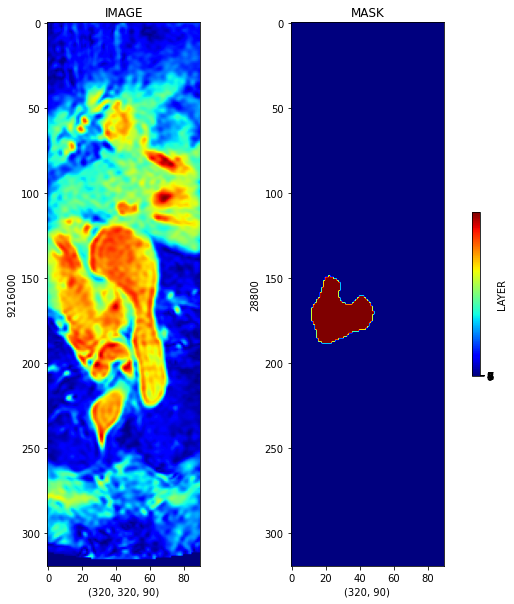

In [26]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2],cmap="jet")
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2],cmap="jet")
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

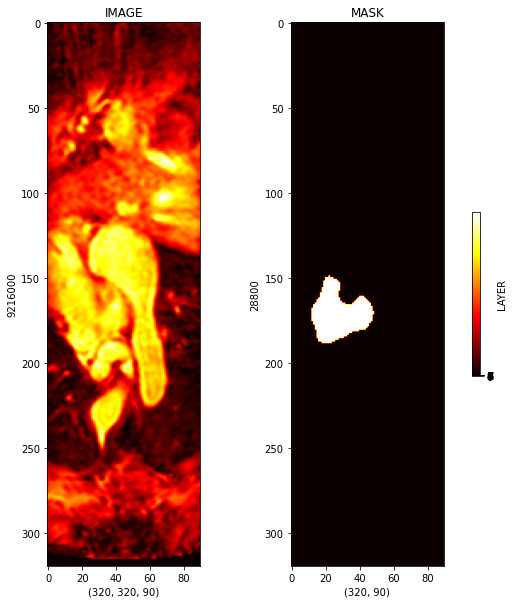

In [27]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2],cmap="hot")
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2],cmap="hot")
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

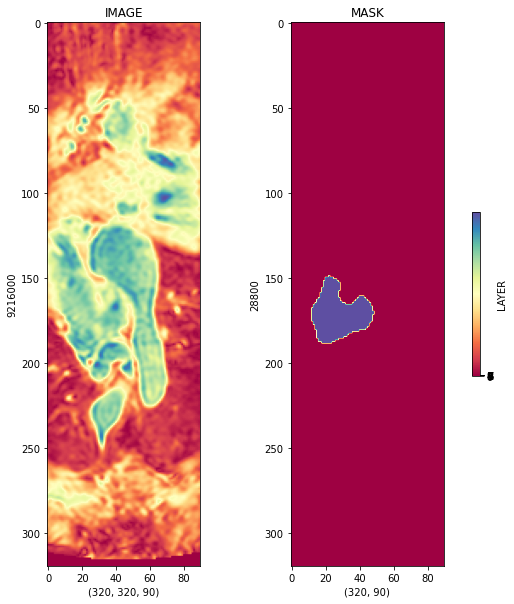

In [28]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2],cmap="Spectral")
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2],cmap="Spectral")
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

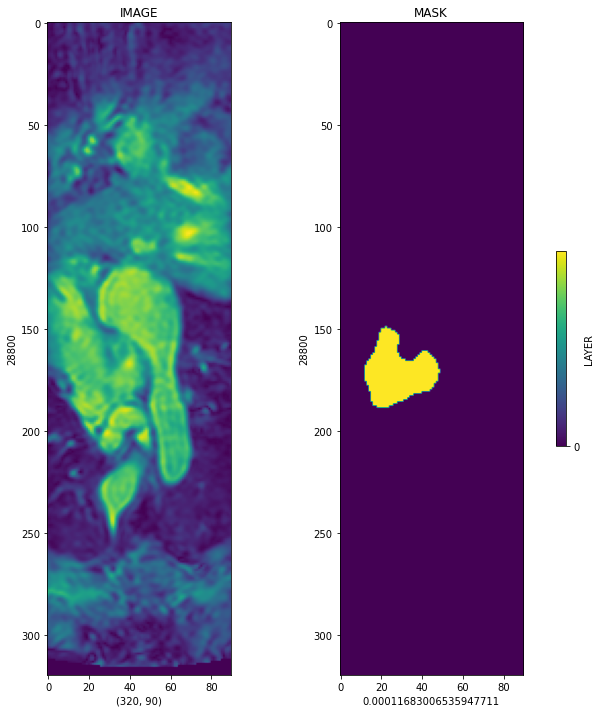

In [29]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Example_ALL_Images[Example_ALL_Images.shape[0]//2] / 255.
Picking_Example_Label = Example_ALL_Labels[Example_ALL_Images.shape[0]//2] / 255.

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

Plot_Color_Op = axis[1].imshow(Picking_Example_Label)
axis[1].set_xlabel(np.mean(Picking_Example_Label))
axis[1].set_ylabel(Picking_Example_Label.size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

# DATA PROCESS

#### PATH PROCESS

In [30]:
Main_NII_Path = Path("C:/Users/johnm/Downloads/input/heart-mri-image-dataset-left-atrial-segmentation/imagesTr")
Label_NII_Path = Path("C:/Users/johnm/Downloads/input/heart-mri-image-dataset-left-atrial-segmentation/labelsTr")

In [31]:
NII_Images = list(Main_NII_Path.glob(r"*.nii"))
NII_Labels = list(Label_NII_Path.glob(r"*.nii"))

In [32]:
print(len(NII_Images))
print(len(NII_Labels))

0
0


In [33]:
Images_Series = pd.Series(NII_Images,name="IMAGE").astype(str)
Labels_Series = pd.Series(NII_Labels,name="LABEL").astype(str)

In [34]:
Main_Data = pd.concat([Images_Series,Labels_Series],axis=1)

In [35]:
print(Main_Data.head(-1))

Empty DataFrame
Columns: [IMAGE, LABEL]
Index: []


In [36]:
Or_1_0 = []
Image_List = []
Label_List = []

for i_img,i_mask in zip(Main_Data["IMAGE"].values,Main_Data["LABEL"].values):

    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)
    
    X_Images = Reading_Train_NII.get_data()
    X_Labels = Reading_Label_NII.get_data()
     
    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.
    
    if np.mean(Selecting_Label) > 0:
        Or_1_0.append(1)
        Selecting_Image = Selecting_Image.astype("float32")
        Selecting_Label = Selecting_Label.astype("float32")
    
        Image_List.append(Selecting_Image)
        Label_List.append(Selecting_Label)
    else:
        Or_1_0.append(0)

In [37]:
    
for i_img,i_mask in zip(Main_Data["IMAGE"].values,Main_Data["LABEL"].values):
    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)
    
    X_Images = Reading_Train_NII.get_data()
    X_Labels = Reading_Label_NII.get_data()
     
    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.
    
    print(np.shape(Selecting_Image))
    print(np.shape(Selecting_Label))
    print("---"*20)

In [38]:
print(Or_1_0)

[]


In [39]:
print(len(Or_1_0))

0


In [40]:
Main_Data["1_OR_0"] = Or_1_0

In [41]:
print(Main_Data.head(-1))

                                                IMAGE  \
0   C:\Users\johnm\Downloads\input\heart-mri-image...   
1   C:\Users\johnm\Downloads\input\heart-mri-image...   
2   C:\Users\johnm\Downloads\input\heart-mri-image...   
3   C:\Users\johnm\Downloads\input\heart-mri-image...   
4   C:\Users\johnm\Downloads\input\heart-mri-image...   
5   C:\Users\johnm\Downloads\input\heart-mri-image...   
6   C:\Users\johnm\Downloads\input\heart-mri-image...   
7   C:\Users\johnm\Downloads\input\heart-mri-image...   
8   C:\Users\johnm\Downloads\input\heart-mri-image...   
9   C:\Users\johnm\Downloads\input\heart-mri-image...   
10  C:\Users\johnm\Downloads\input\heart-mri-image...   
11  C:\Users\johnm\Downloads\input\heart-mri-image...   
12  C:\Users\johnm\Downloads\input\heart-mri-image...   
13  C:\Users\johnm\Downloads\input\heart-mri-image...   
14  C:\Users\johnm\Downloads\input\heart-mri-image...   
15  C:\Users\johnm\Downloads\input\heart-mri-image...   
16  C:\Users\johnm\Downloads\in

#### READING PROCESS

In [42]:
print(len(Image_List))
print(len(Label_List))

18
18


In [43]:
print(Image_List[0].shape)
print(Label_List[0].shape)

(320, 110)
(320, 110)


In [44]:
print(type(Image_List[0]))
print(type(Label_List[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [45]:
Testing_Trans = cv2.resize(Image_List[8],(256,256))

In [46]:
print(Testing_Trans.shape)

(256, 256)


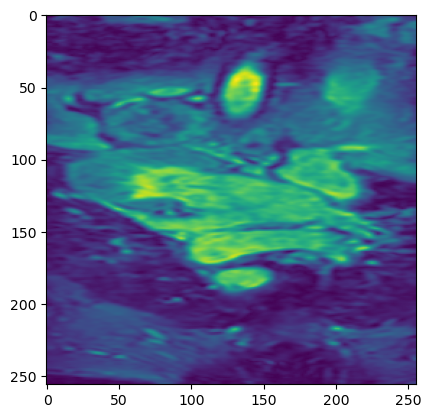

In [47]:
plt.imshow(Testing_Trans)

In [48]:
True_Seg = Main_Data[Main_Data["1_OR_0"] == 1]

In [49]:
Image_List = []
Label_List = []

for i_img,i_mask in zip(True_Seg["IMAGE"].values,True_Seg["LABEL"].values):

    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)
    
    X_Images = Reading_Train_NII.get_data()
    X_Labels = Reading_Label_NII.get_data()
     
    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.
    
    Selecting_Image = Selecting_Image.astype("float32")
    Selecting_Label = Selecting_Label.astype("float32")
    
    Resized_IMG = cv2.resize(Selecting_Image,(256,256))
    Resized_LABEL = cv2.resize(Selecting_Label,(256,256))
    
    Image_List.append(Resized_IMG)
    Label_List.append(Resized_LABEL)

In [50]:
print(len(Image_List))
print(len(Label_List))

18
18


In [51]:
for indexing_i in range(len(Image_List)):
    print("---"*10)
    print(Image_List[indexing_i].shape)
    print(Label_List[indexing_i].shape)

------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)


In [52]:
print(np.shape(np.array(Image_List)))
print(np.shape(np.array(Label_List)))

(18, 256, 256)
(18, 256, 256)


#### CHECKING

Text(0.5, 1.0, 'MASK')

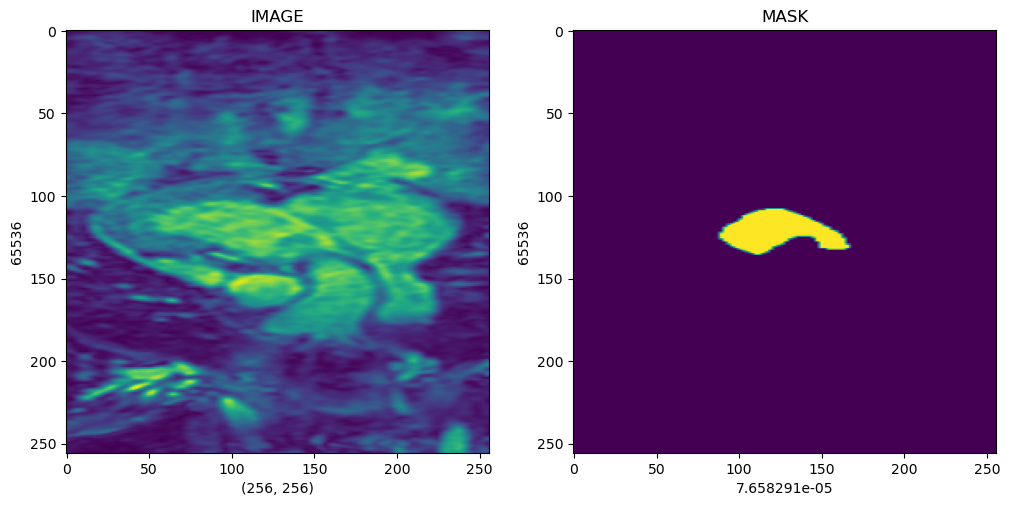

In [53]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[0]
Picking_Example_Label = Label_List[0]

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Picking_Example_Label)
axis[1].set_xlabel(np.mean(Picking_Example_Label))
axis[1].set_ylabel(Picking_Example_Label.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

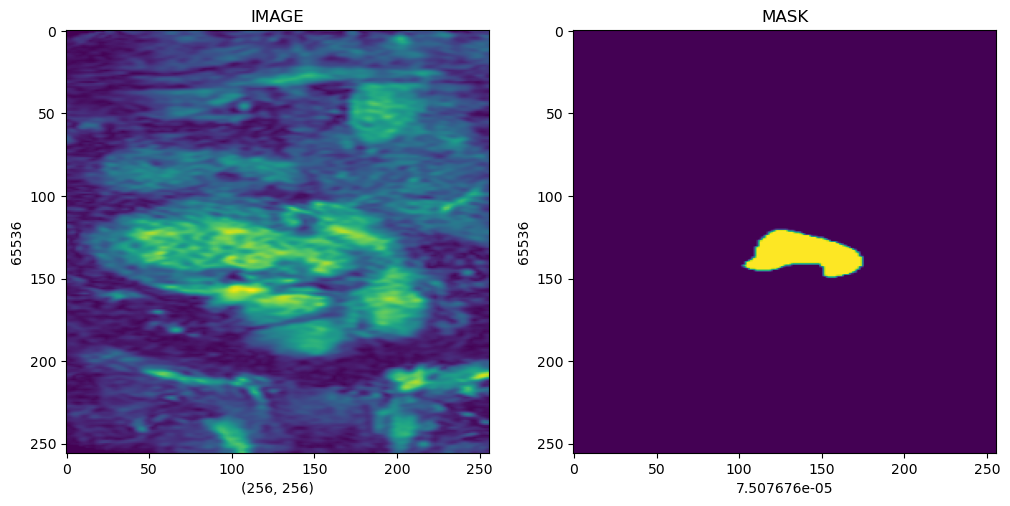

In [54]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[2]
Picking_Example_Label = Label_List[2]

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Picking_Example_Label)
axis[1].set_xlabel(np.mean(Picking_Example_Label))
axis[1].set_ylabel(Picking_Example_Label.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

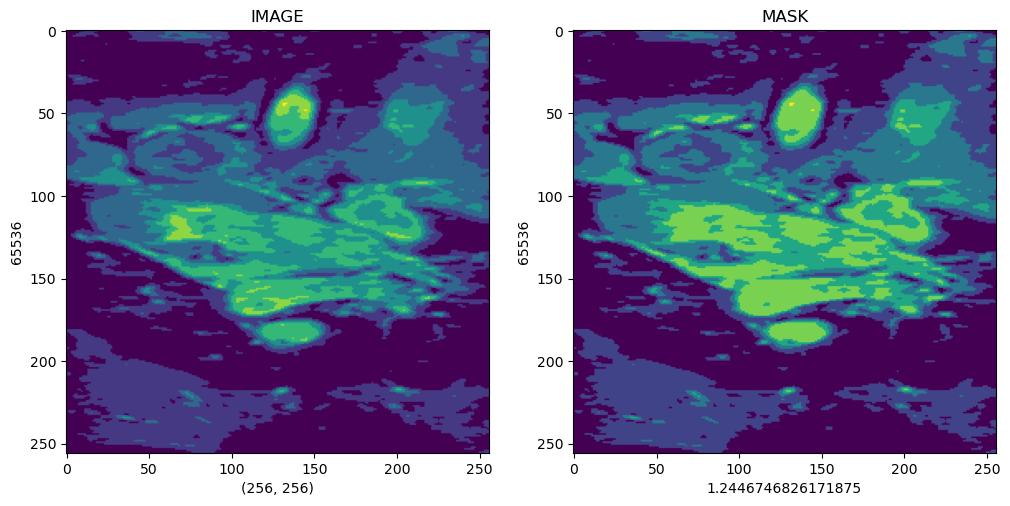

In [55]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[8]
Picking_Example_Label = Label_List[8]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Canny_Image = cv2.Canny(Picking_Example_Label,10,100)

NP_Kernel = np.ones((5,5),np.uint8)
Dilation_Image = cv2.dilate(Canny_Image,NP_Kernel,iterations = 5)

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Dilation_Image,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image)
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

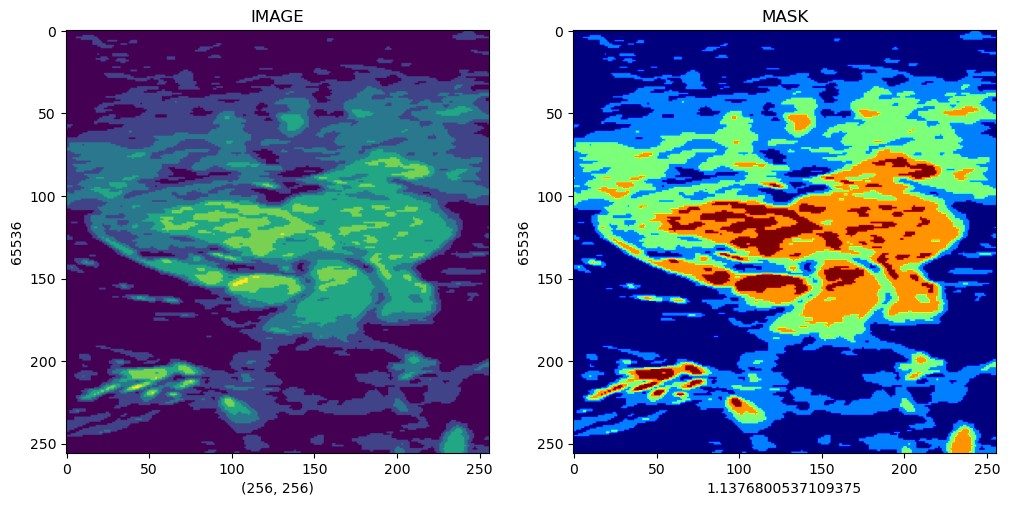

In [56]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[0]
Picking_Example_Label = Label_List[0]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Canny_Image = cv2.Canny(Picking_Example_Label,10,100)

NP_Kernel = np.ones((5,5),np.uint8)
Dilation_Image = cv2.dilate(Canny_Image,NP_Kernel,iterations = 5)

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Dilation_Image,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image,cmap="jet")
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

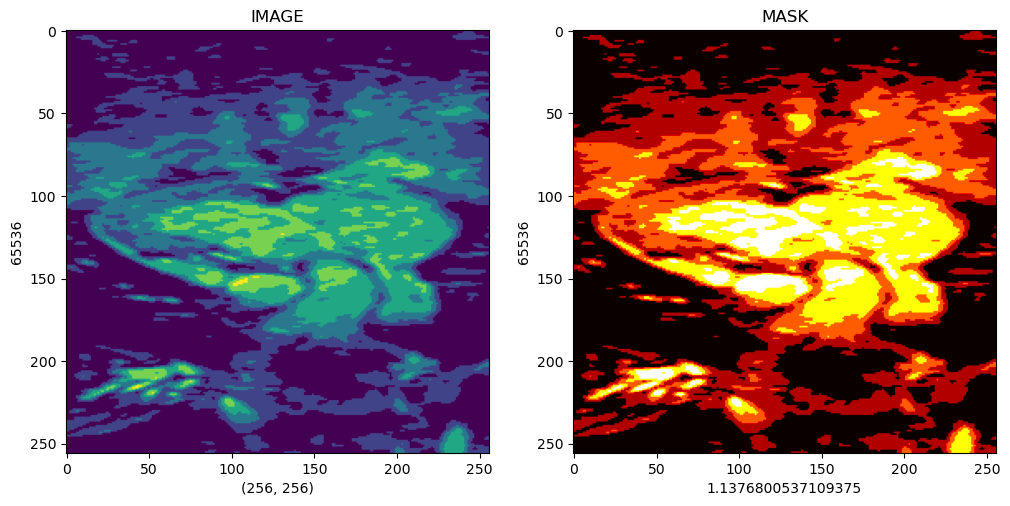

In [57]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[0]
Picking_Example_Label = Label_List[0]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Canny_Image = cv2.Canny(Picking_Example_Label,10,100)

NP_Kernel = np.ones((5,5),np.uint8)
Dilation_Image = cv2.dilate(Canny_Image,NP_Kernel,iterations = 5)

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Dilation_Image,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image,cmap="hot")
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

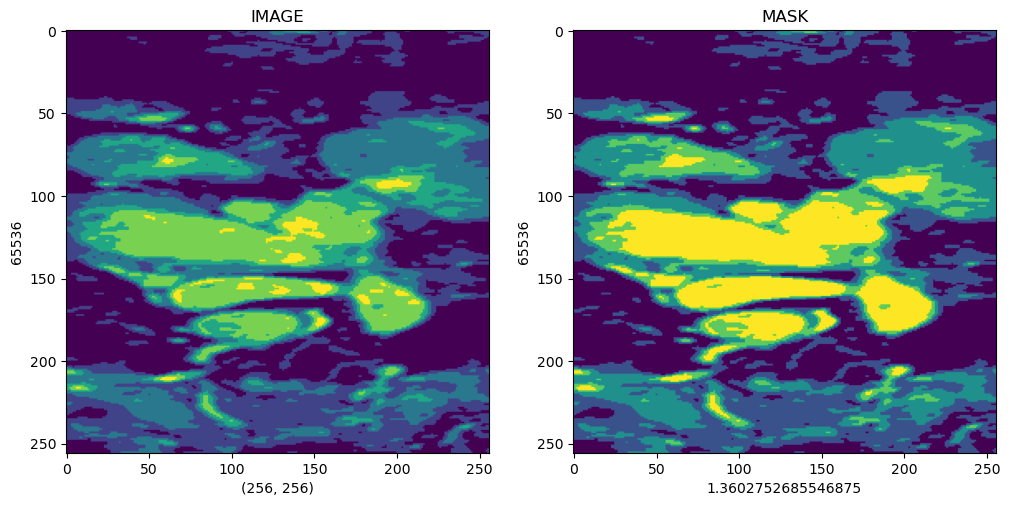

In [58]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[11]
Picking_Example_Label = Label_List[11]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Picking_Example_Label,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image)
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

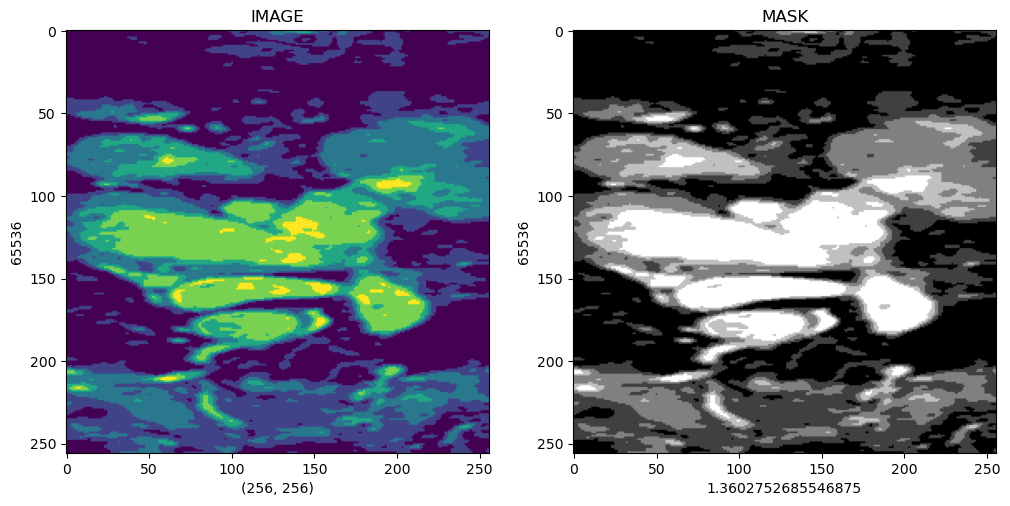

In [59]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[11]
Picking_Example_Label = Label_List[11]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Picking_Example_Label,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image,cmap="gray")
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

#### TO ARRAY

In [60]:
X_TRAIN = np.array(Image_List,dtype="float32")
X_LABEL = np.array(Label_List,dtype="float32")

In [61]:
print(X_TRAIN.shape)
print(X_LABEL.shape)

(18, 256, 256)
(18, 256, 256)


In [62]:
X_TRAIN = X_TRAIN.reshape(X_TRAIN.shape[0],X_TRAIN.shape[1],X_TRAIN.shape[2],1)
X_LABEL = X_LABEL.reshape(X_LABEL.shape[0],X_LABEL.shape[1],X_LABEL.shape[2],1)

In [63]:
print(X_TRAIN.shape)
print(X_LABEL.shape)

(18, 256, 256, 1)
(18, 256, 256, 1)


In [64]:
print(X_TRAIN[0:-1].shape)

(17, 256, 256, 1)


# MODEL

In [65]:
Encoder = Sequential()
#
Encoder.add(Conv2D(32,(5,5),kernel_initializer = 'he_normal',use_bias=True,name="ENCODER_INPUT"))
Encoder.add(BatchNormalization())
Encoder.add(ReLU())
#
Encoder.add(Conv2D(64,(5,5),kernel_initializer = 'he_normal',use_bias=True))
Encoder.add(BatchNormalization())
Encoder.add(ReLU())
#
Encoder.add(Conv2D(128,(2,2),kernel_initializer = 'he_normal',use_bias=True))
Encoder.add(BatchNormalization())
Encoder.add(ReLU())
#
Encoder.add(Conv2D(128,(2,2),kernel_initializer = 'he_normal',use_bias=True))
Encoder.add(BatchNormalization())
Encoder.add(ReLU())



Decoder = Sequential()
#
Decoder.add(Conv2DTranspose(128,(2,2)))
Decoder.add(ReLU())
#
Decoder.add(Conv2DTranspose(64,(2,2)))
Decoder.add(ReLU())
#
Decoder.add(Conv2DTranspose(32,(5,5)))
Decoder.add(ReLU())
#
Decoder.add(Conv2DTranspose(1,(5,5),name="DECODER_OUTPUT"))

In [66]:
AE_Structure = Sequential([Encoder,Decoder])

In [67]:
AE_Structure.compile(loss="binary_crossentropy",optimizer=Adam(lr=0.0000001),metrics=["accuracy"])

In [ ]:
AE_Model = AE_Structure.fit(X_TRAIN[0:-1],X_LABEL[0:-1],epochs=100)

Epoch 1/100
1/1 [==============================] - 19s 19s/step - loss: 2.0671 - accuracy: 0.6392
Epoch 2/100


KeyboardInterrupt: 

In [ ]:
Prediction_MASK = AE_Structure.predict(X_TRAIN[:10])

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 1

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 2

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="hot")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 3

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 7

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(14,14))
img_number = 9

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]
Main_Mask = X_LABEL[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Main_Mask)
axis[1].set_xlabel(Main_Mask.shape)
axis[1].set_ylabel(Main_Mask.size)
axis[1].set_title("MASKING")
axis[2].imshow(Predict_Mask,cmap="jet")
axis[2].set_xlabel(Predict_Mask.shape)
axis[2].set_ylabel(Predict_Mask.size)
axis[2].set_title("PREDICTION")

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(14,14))
img_number = 1

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]
Main_Mask = X_LABEL[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Main_Mask)
axis[1].set_xlabel(Main_Mask.shape)
axis[1].set_ylabel(Main_Mask.size)
axis[1].set_title("MASKING")
axis[2].imshow(Predict_Mask,cmap="jet")
axis[2].set_xlabel(Predict_Mask.shape)
axis[2].set_ylabel(Predict_Mask.size)
axis[2].set_title("PREDICTION")

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(14,14))
img_number = 5

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]
Main_Mask = X_LABEL[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Main_Mask)
axis[1].set_xlabel(Main_Mask.shape)
axis[1].set_ylabel(Main_Mask.size)
axis[1].set_title("MASKING")
axis[2].imshow(Predict_Mask,cmap="jet")
axis[2].set_xlabel(Predict_Mask.shape)
axis[2].set_ylabel(Predict_Mask.size)
axis[2].set_title("PREDICTION")

In [ ]:
print(X_TRAIN[17:].shape)

In [ ]:
Prediction_NON_SEEN = AE_Structure.predict(X_TRAIN[17:])

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 17

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_NON_SEEN[0]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")